<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

## Análise Exploratória dos Dados

Vamos importar os pacotes necessários e iniciar nossa Análise Exploratória.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv')


Parte importante da nossa análise, é descobrir o tamanho do dataset que estamos encarando.

 Vamos verificar:

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  33 
Entradas:  24023


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [ ]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

Outro detalhe importante que precisamos verificar e garantir que estão da forma que precisamos é o tipo das variáveis. Para isso, utilizaremos o método `dtypes`.

In [ ]:
# verificando o tipo das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Outro detalhe importante é a verificação em relação aos dados ausentes. Lembre-se de se atentar não para **quais** dados estão faltando, mas também o **motivo** deles estarem faltando.

Para isso, é importante verificar a fonte dos dados, entender a coleta deles, verificar a aleatoriedade dessa ausência, etc.

In [ ]:
# verificando dados ausentes
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

new_tests_per_thousand             0.76
new_tests                          0.76
total_tests                        0.73
total_tests_per_thousand           0.73
new_tests_smoothed                 0.71
new_tests_smoothed_per_thousand    0.71
tests_units                        0.68
handwashing_facilities             0.60
extreme_poverty                    0.40
male_smokers                       0.28
female_smokers                     0.27
stringency_index                   0.21
hospital_beds_per_thousand         0.17
aged_65_older                      0.11
gdp_per_capita                     0.10
aged_70_older                      0.10
median_age                         0.09
cvd_death_rate                     0.09
diabetes_prevalence                0.06
population_density                 0.04
total_deaths_per_million           0.01
new_deaths_per_million             0.01
total_cases_per_million            0.01
new_cases_per_million              0.01
continent                          0.01


Como vimos ao analisar o tipo das variáveis, verificamos que a coluna `date` não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime.

In [ ]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

Após alterar o formato, vamos verificar qual a data mais recente do nosso dataset. Com essa informação, vamos verificar o país líder em casos naquele momento.

In [ ]:
# verificando a data mais recente do dataset
df.date.max()

Timestamp('2020-06-15 00:00:00')

In [ ]:
# total de casos
df.loc[df.date == '2020-06-15'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
18171,RUS,Europe,Russia,2020-06-15,528964.0,8835.0,6948.0,119.0,3624.668,60.541,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
10141,IND,Asia,India,2020-06-15,332424.0,11502.0,9520.0,325.0,240.886,8.335,...,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,VGB,North America,British Virgin Islands,2020-06-15,8.0,0.0,1.0,0.0,264.577,0.000,...,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
17012,PNG,Oceania,Papua New Guinea,2020-06-15,8.0,0.0,0.0,0.0,0.894,0.000,...,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN
2925,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-15,7.0,0.0,0.0,0.0,266.962,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12602,LSO,Africa,Lesotho,2020-06-15,4.0,0.0,0.0,0.0,1.867,0.000,...,4.506,2.647,2851.153,59.6,405.126,3.94,0.400,53.900,2.117,NaN


Pudemos verificar que os países líderes em casos aos 15 de Junho de 2020 eram:

* Estados Unidos - 2.094.069 casos
* Brasil - 867.624 casos
* Russia - 528.964 casos

Agora, vamos verificar os casos de morte.

In [ ]:
# total de mortes
df.loc[df.date == '2020-06-15'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,...,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
22706,GBR,Europe,United Kingdom,2020-06-15,295889.0,1514.0,41698.0,36.0,4358.616,22.302,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540
11226,ITA,Europe,Italy,2020-06-15,236989.0,338.0,34345.0,44.0,3919.647,5.590,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,PYF,Oceania,French Polynesia,2020-06-15,60.0,0.0,0.0,0.0,213.596,0.000,...,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN
7504,FJI,Oceania,Fiji,2020-06-15,18.0,0.0,0.0,0.0,20.079,0.000,...,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300
18439,LCA,North America,Saint Lucia,2020-06-15,19.0,0.0,0.0,0.0,103.469,0.000,...,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.300
7416,FLK,South America,Falkland Islands,2020-06-15,13.0,0.0,0.0,0.0,3732.415,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em relação às mortes, os países que lideravam aos 15 de Junho de 2020 eram:

* Estados Unidos - 115.732
* Brasil - 43.332
* Grã-Bretanha - 41.698

Para melhorar a visualização, vamos plotar um gráfico de barras.

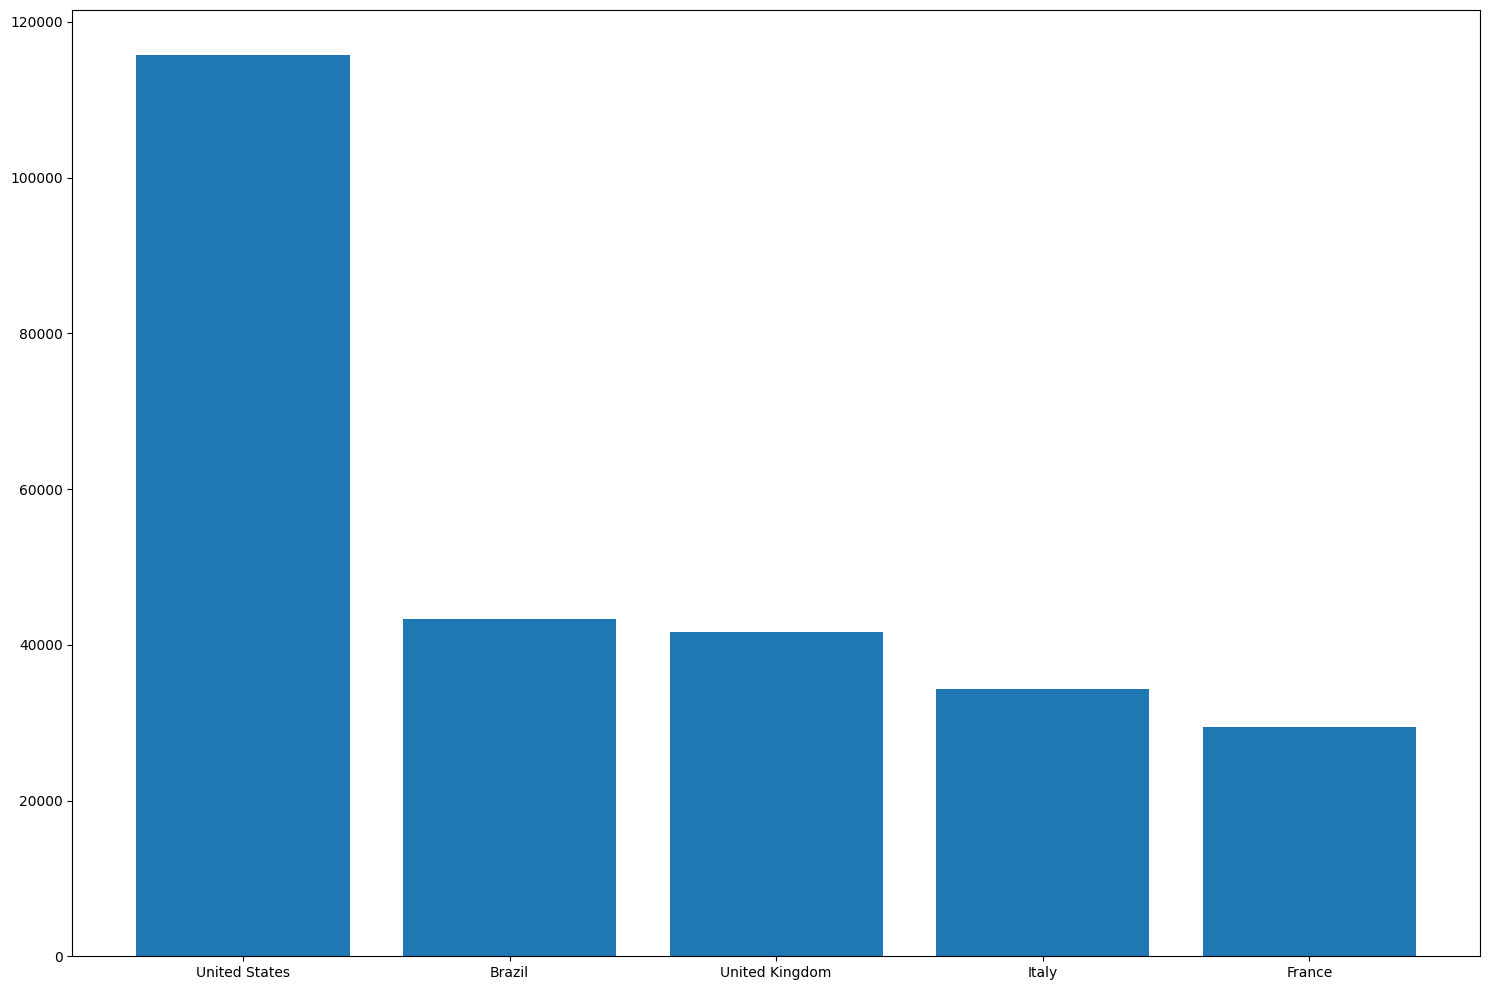

In [ ]:
# gráfico de barras para total de mortes
top_5_total_deaths = df.loc[df.date == '2020-06-15', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()


### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

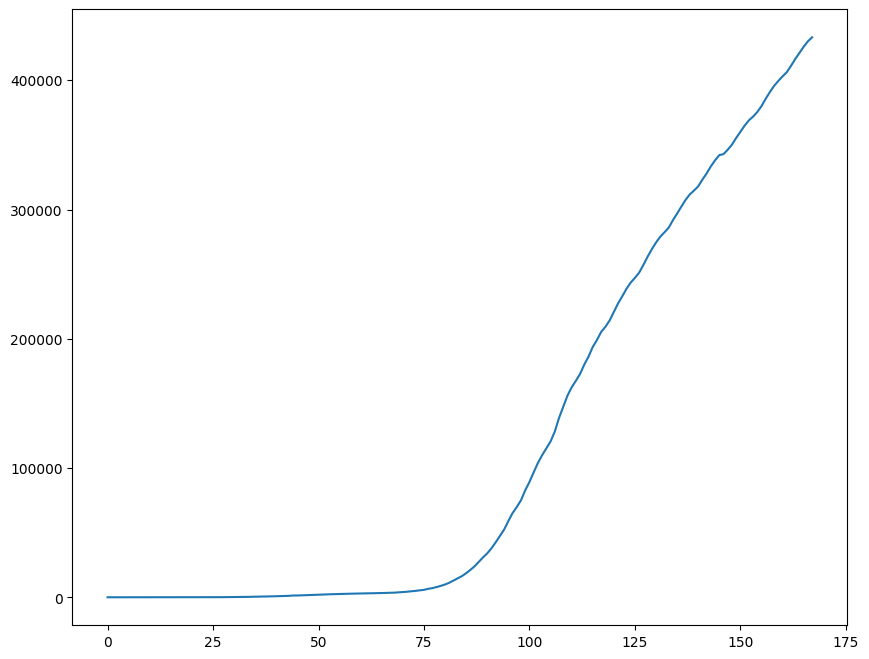

In [ ]:
# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

### Análise Exploratória para o Brasil

Agora que já temos uma noção dos acontecimentos no mundo, vamos focar nos acontecimentos no Brasil.

In [ ]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3097,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3098,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3099,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3100,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3101,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
df_brasil.date.max()

Timestamp('2020-06-15 00:00:00')

Acima, verificamos que nosso dataset inclui datas desde **31-12-2019** até **15-06-2020**.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.

In [ ]:
# Identificar quando foi registrada a primeira morte no Brasil
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3175,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# identificaçãso do primeiro caso
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[3154]))

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [ ]:
# primeira morte
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3175,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,...,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
# primeira morte
df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1)
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[3175]))

A primeira morte foi registrada em 2020-03-18 00:00:00


Uma informação interessante para investigarmos é quanto tempo levou desde o primeiro caso até a primeira morte.

In [ ]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte
from datetime import date
delta = df_brasil.date.loc[3175] - df_brasil.date.loc[3154]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

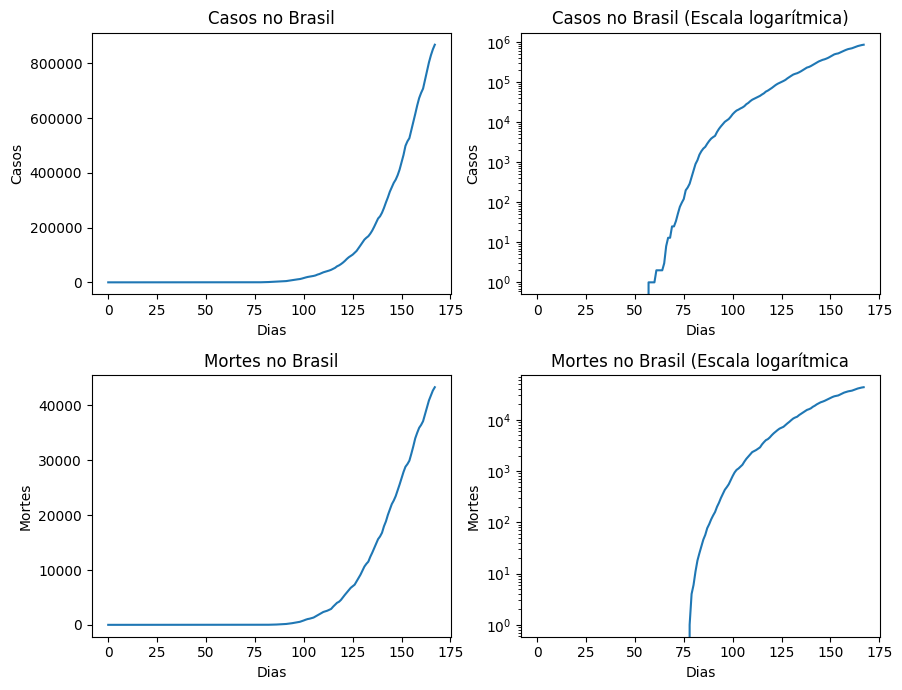

In [ ]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(168))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

## Conclusão

Um detalhe extremamente importante a ser destacado é que esses dados são medidos diariamente, e esse conjunto de dados ficará desatualizado "rapidamente".

Entretanto, levando em consideração o contexto dos dados analisados, vale a pena destacar que:

* Os Estados Unidos estão disparados em relação aos casos e mortes.
* A evolução dos casos no Brasil está em crescimento avassalador.
* No geral, casos e mortes ainda estão crescendo.

Muitas outras análises podem ser retiradas desse conjunto de dados, mas com essa análise inicial já conseguimos retirar muitas informações.